In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab

In [28]:
data=pd.read_csv(r'final_dataset.csv')
data.head()

,Unnamed: 0,artists,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,0,"""Weird Al"" Yankovic",0.176934,0.664788,218165.2576,0.685136,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132,"['antiviral pop', 'comedy rock', 'comic', 'par..."
1,1,$pyda,0.000122,0.514000,331240.0000,0.899000,0.367000,-5.115000,0.060200,174.028000,0.266000,58.000000,7,1,1,['others']
2,2,'Be More Chill' Ensemble,0.764000,0.497000,164400.0000,0.474000,0.453000,-7.279000,0.044000,133.934000,0.493000,52.000000,3,1,1,['others']
3,3,'In The Heights' Original Broadway Company,0.636588,0.541000,301908.2941,0.402282,0.193824,-9.405882,0.150006,114.952529,0.407765,46.588235,7,1,17,"['broadway', 'show tunes']"
4,4,'Little Women' Original Broadway Cast,0.902000,0.345000,275360.0000,0.325000,0.072100,-7.955000,0.035400,90.030000,0.168000,42.000000,1,1,2,['others']


In [29]:
data=data.iloc[:,2:-1]
data.head()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,0.176934,0.664788,218165.2576,0.685136,0.162139,-9.877909,0.082392,132.495091,0.754409,33.681818,9,1,132
1,0.000122,0.514000,331240.0000,0.899000,0.367000,-5.115000,0.060200,174.028000,0.266000,58.000000,7,1,1
2,0.764000,0.497000,164400.0000,0.474000,0.453000,-7.279000,0.044000,133.934000,0.493000,52.000000,3,1,1
3,0.636588,0.541000,301908.2941,0.402282,0.193824,-9.405882,0.150006,114.952529,0.407765,46.588235,7,1,17
4,0.902000,0.345000,275360.0000,0.325000,0.072100,-7.955000,0.035400,90.030000,0.168000,42.000000,1,1,2


#### Computing mean for each column

In [30]:
data.mean(axis=0)

acousticness         0.431509
danceability         0.542989
duration_ms     235149.927895
energy               0.529603
liveness             0.189526
loudness           -10.749018
speechiness          0.057234
tempo              117.679942
valence              0.515506
popularity          40.556002
key                  5.422444
mode                 0.779178
count               16.831291
dtype: float64

#### Computing variance for each column

In [31]:
data.var(axis=0)

acousticness    1.195774e-01
danceability    2.828590e-02
duration_ms     5.812268e+09
energy          6.318132e-02
liveness        1.599953e-02
loudness        3.416535e+01
speechiness     8.192908e-04
tempo           5.410586e+02
valence         5.898998e-02
popularity      3.131414e+02
key             1.211899e+01
mode            1.720695e-01
count           3.378881e+03
dtype: float64

In [32]:
data.describe()

,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000,17136.000000
mean,0.431509,0.542989,235149.927895,0.529603,0.189526,-10.749018,0.057234,117.679942,0.515506,40.556002,5.422444,0.779178,16.831291
std,0.345800,0.168184,76238.233780,0.251359,0.126489,5.845113,0.028623,23.260666,0.242879,17.695802,3.481234,0.414813,58.128141
min,0.000001,-0.016048,27867.000000,-0.382663,0.011600,-60.000000,0.000000,12.198667,0.000003,0.003802,0.000000,0.000000,1.000000
25%,0.099200,0.439390,186553.750000,0.338458,0.109000,-13.295300,0.037200,102.924750,0.333750,31.111111,2.000000,1.000000,2.000000
50%,0.364985,0.555174,223393.252950,0.553000,0.155450,-9.515702,0.047000,117.282617,0.522000,43.000000,6.000000,1.000000,4.000000
75%,0.769000,0.663035,268618.300000,0.728000,0.227172,-6.561000,0.068100,130.283853,0.705000,53.000000,8.000000,1.000000,11.000000
max,0.996000,0.975000,600000.000000,1.000000,0.991000,1.342000,0.154608,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


## BEFORE NORMALISATION

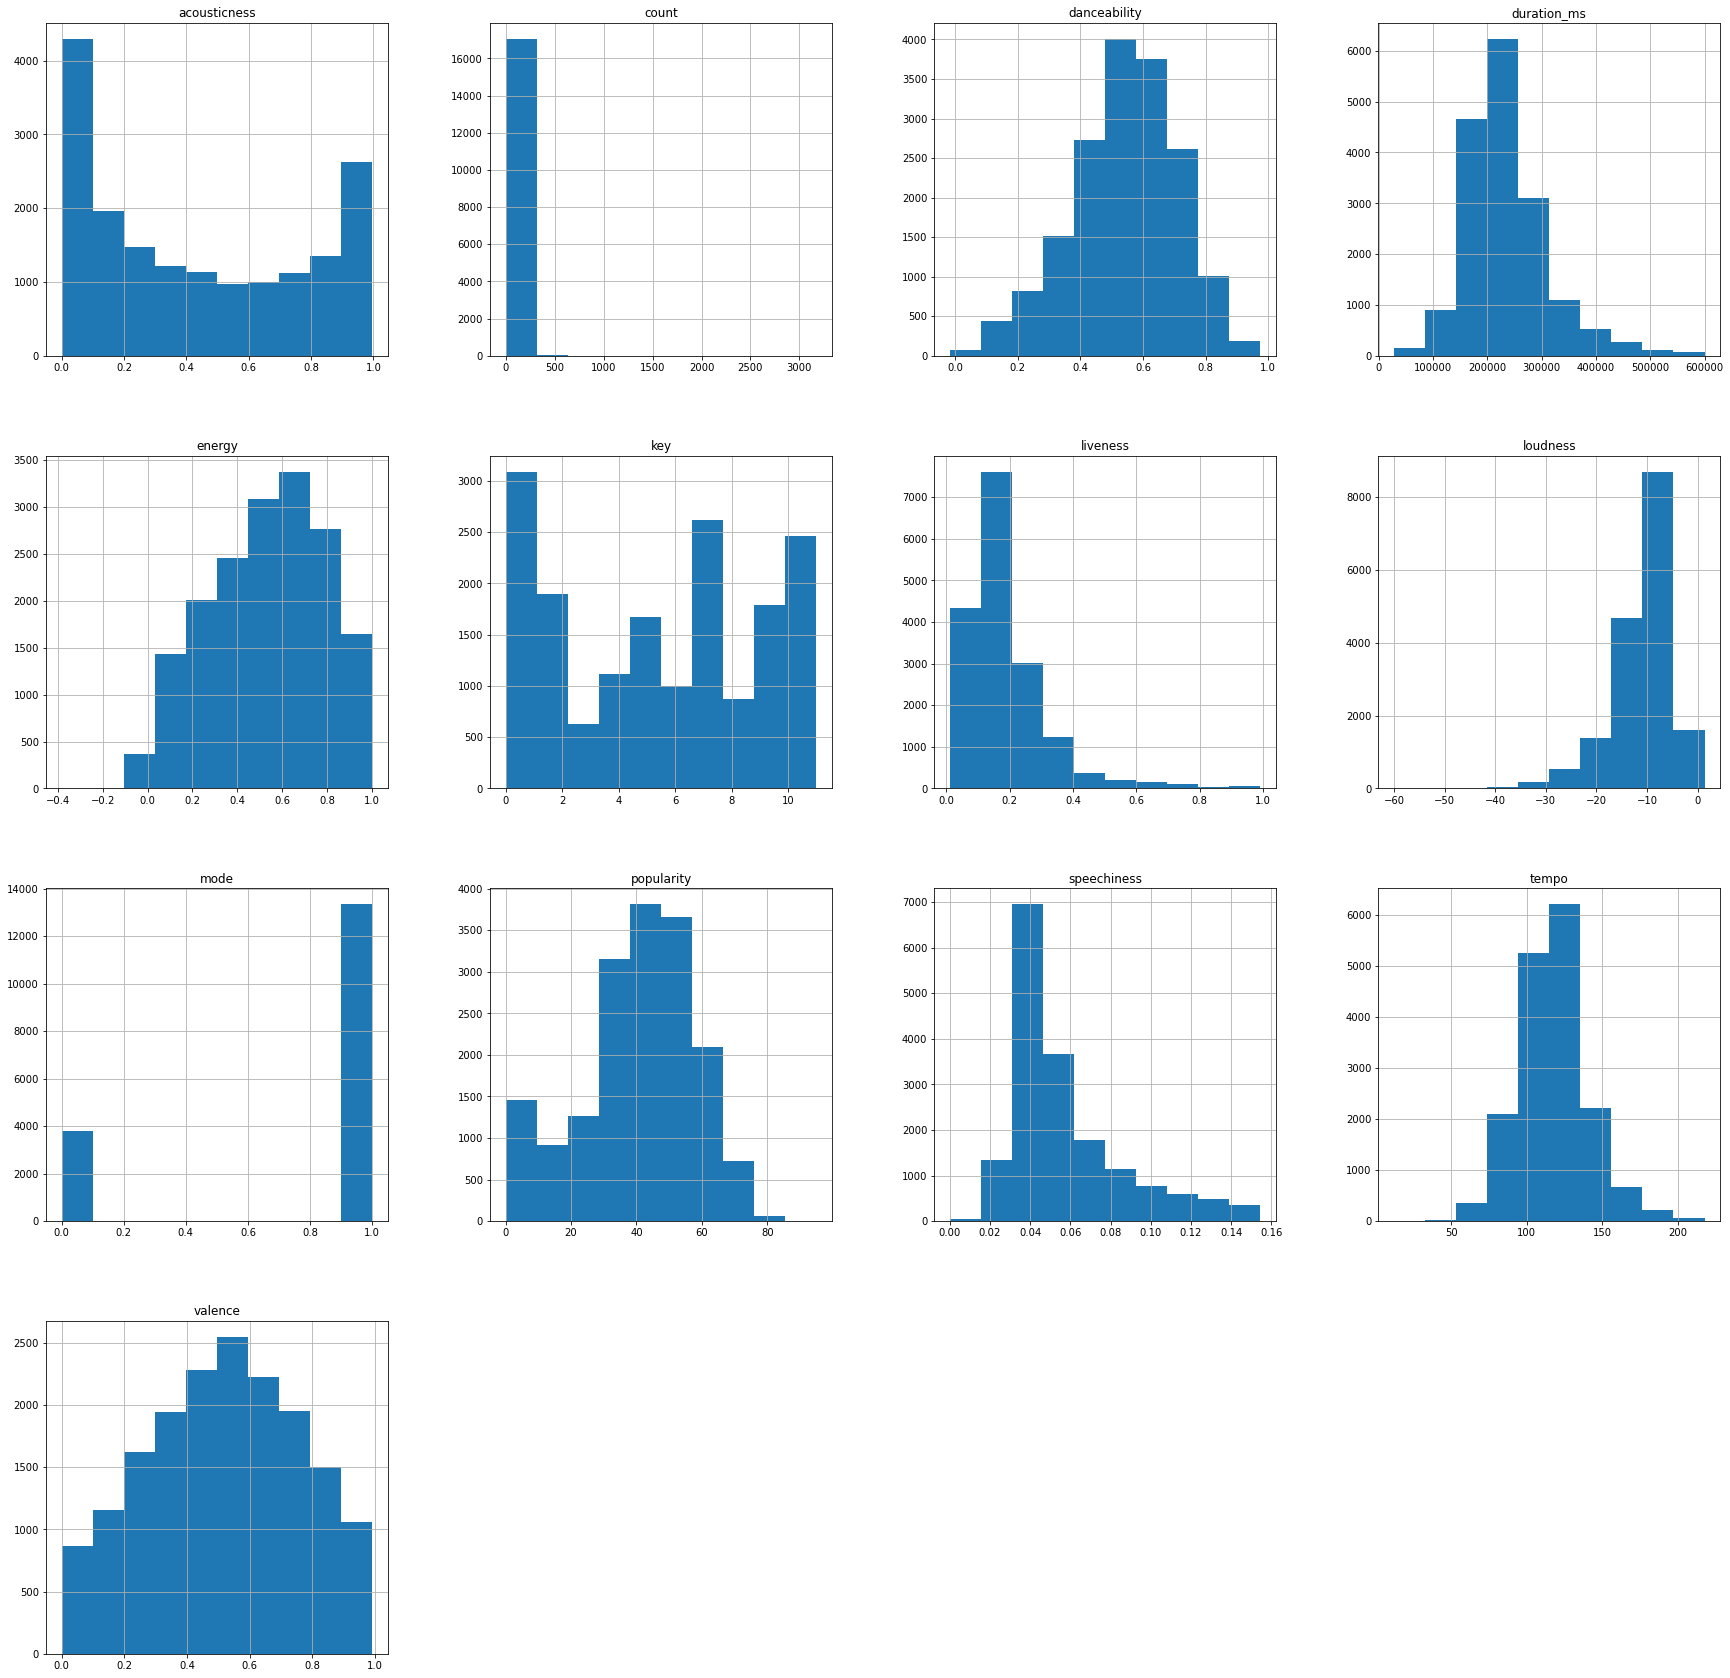

In [33]:
data.hist(figsize=(30,30))
plt.show()

## z-score Normalization
It is much less affected by outliers.
#### StandardScaler
 
 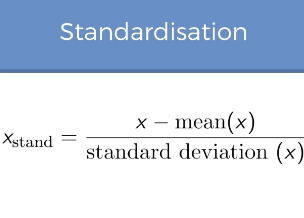

Standardize generally means changing the values so that the distribution is centered around 0, with a standard deviation of 1.


In [36]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_sc=sc.fit_transform(data)
data_sc= pd.DataFrame(data_sc)
data_sc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.736213,0.724221,-0.222791,0.618786,-0.216518,0.149036,0.878972,0.636937,0.983660,-0.388475,1.027699,0.532356,1.981348
1,-1.247542,-0.172369,1.260429,1.469640,1.403118,0.963913,0.103621,2.422532,-1.027318,0.985799,0.453173,0.532356,-0.272360
2,0.961542,-0.273452,-0.928038,-0.221218,2.083038,0.593679,-0.462369,0.698799,-0.092667,0.646726,-0.695878,0.532356,-0.272360
3,0.593076,-0.011826,0.875680,-0.506546,0.033978,0.229794,3.241227,-0.117258,-0.443615,0.340895,0.453173,0.532356,0.002902
4,1.360628,-1.177249,0.527442,-0.814013,-0.928373,0.478023,-0.762832,-1.188734,-1.430823,0.081604,-1.270404,0.532356,-0.255156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17131,1.554388,-1.082113,-0.615325,-1.625625,-0.091124,-1.169555,-0.514775,-0.544366,-1.455528,-2.178886,-0.408615,0.532356,-0.255156
17132,1.592947,-0.277416,-0.697469,-1.432005,-0.471404,-1.223619,2.811289,0.565494,0.003406,-1.971674,-0.121352,0.532356,-0.186340
17133,1.250735,0.505479,-1.136693,-1.422722,-0.605016,-1.209076,0.096634,0.052238,-0.166780,0.025091,1.602224,0.532356,-0.255156
17134,1.583307,-1.795637,-1.173145,-1.857173,-0.814526,-2.635951,-0.294668,-2.048838,-1.961969,1.098824,-0.983141,-1.878441,-0.255156


In [37]:
print(data_sc.describe())

                 0             1             2             3             4   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -1.459047e-16  4.806690e-16 -5.380072e-17 -3.552766e-16  2.127863e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.247891e+00 -3.324056e+00 -2.718964e+00 -3.629443e+00 -1.406689e+00   
25%   -9.610147e-01 -6.160054e-01 -6.374439e-01 -7.604692e-01 -6.366405e-01   
50%   -1.923825e-01  7.245455e-02 -1.542142e-01  9.308279e-02 -2.694049e-01   
75%    9.760015e-01  7.137969e-01  4.390100e-01  7.893186e-01  2.976362e-01   
max    1.632470e+00  2.568754e+00  4.785797e+00  1.871468e+00  6.336488e+00   

                 5             6             7             8             9   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -9.526402e-18 -5.949567e-17  5.308545e-16 -5.779820e-16  3.294906e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.

After standardization the distribution  now is centered at mean and has a standard deviation of 1.

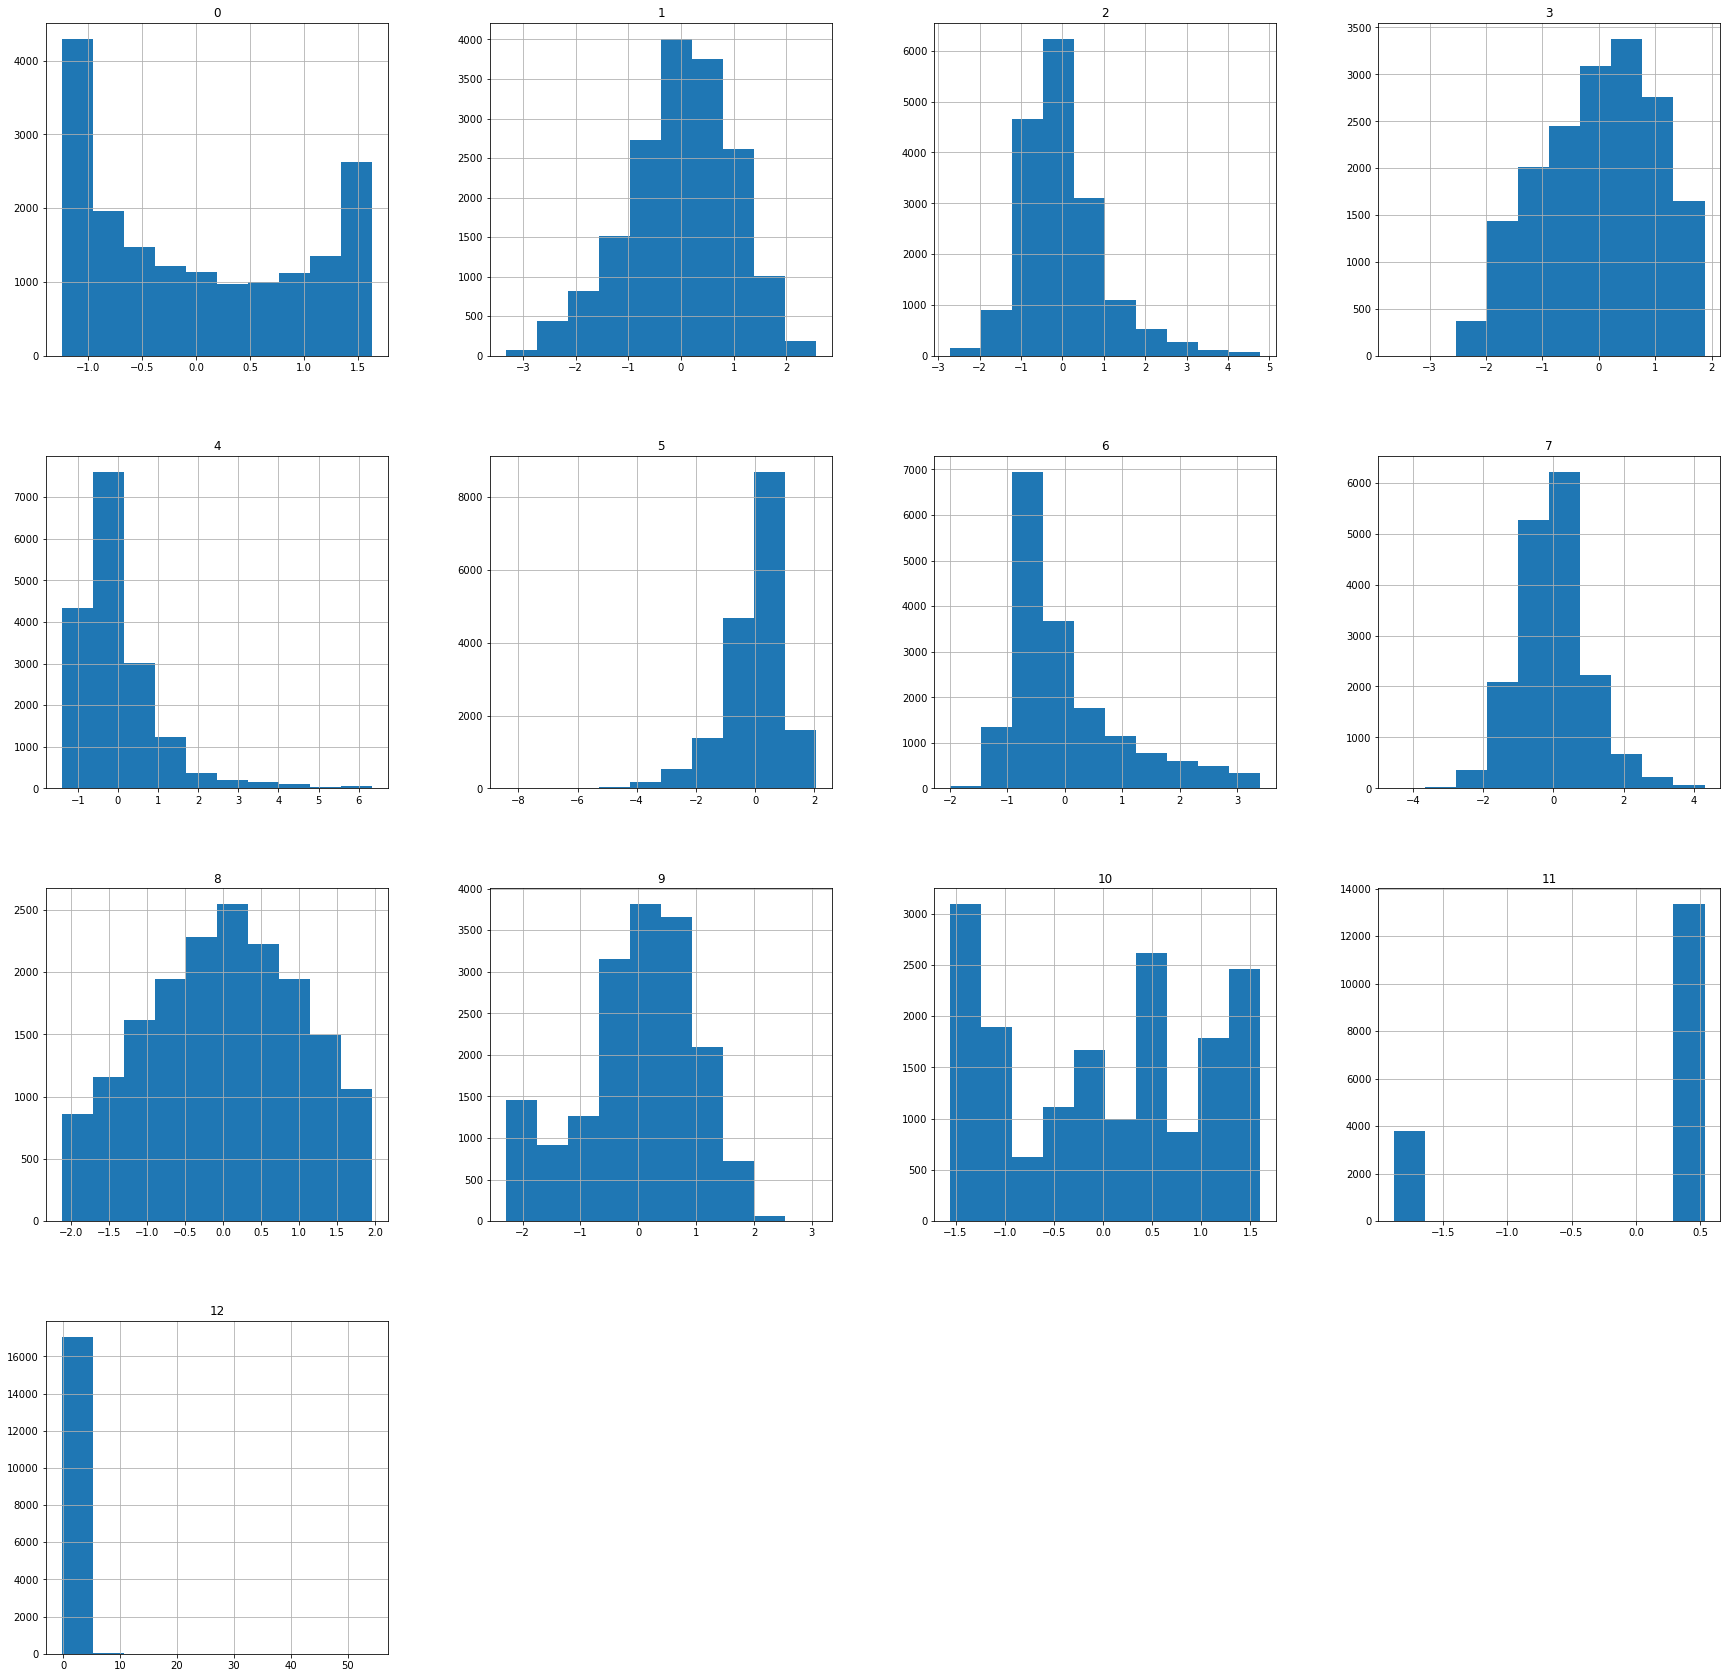

In [38]:
data_sc.hist(figsize=(30,30))
plt.show()

In [39]:
df2=pd.read_csv(r'final_dataset.csv')
df2=df2.iloc[:,1:]

In [40]:
#relacing the filled values back into the original dataset
df2['acousticness']=data_sc[0]
df2['danceability']=data_sc[1]
df2['duration_ms']=data_sc[2]
df2['energy']=data_sc[3]
df2['liveness']=data_sc[4]
df2['loudness']=data_sc[5]
df2['speechiness']=data_sc[6]
df2['tempo']=data_sc[7]
df2['valence']=data_sc[8]
df2['popularity']=data_sc[9]
df2['key']=data_sc[10]
df2['mode']=data_sc[11]
df2['count']=data_sc[12]


In [41]:
#to store the normalised dataset
df2.to_csv('normalised_ds.csv')

In [42]:
print(data_sc.mean())

0    -1.459047e-16
1     4.806690e-16
2    -5.380072e-17
3    -3.552766e-16
4     2.127863e-16
5    -9.526402e-18
6    -5.949567e-17
7     5.308545e-16
8    -5.779820e-16
9     3.294906e-16
10    1.012262e-16
11    1.350538e-15
12    6.847153e-16
dtype: float64


After z-score normalization all the values have meam 0 and variance 1

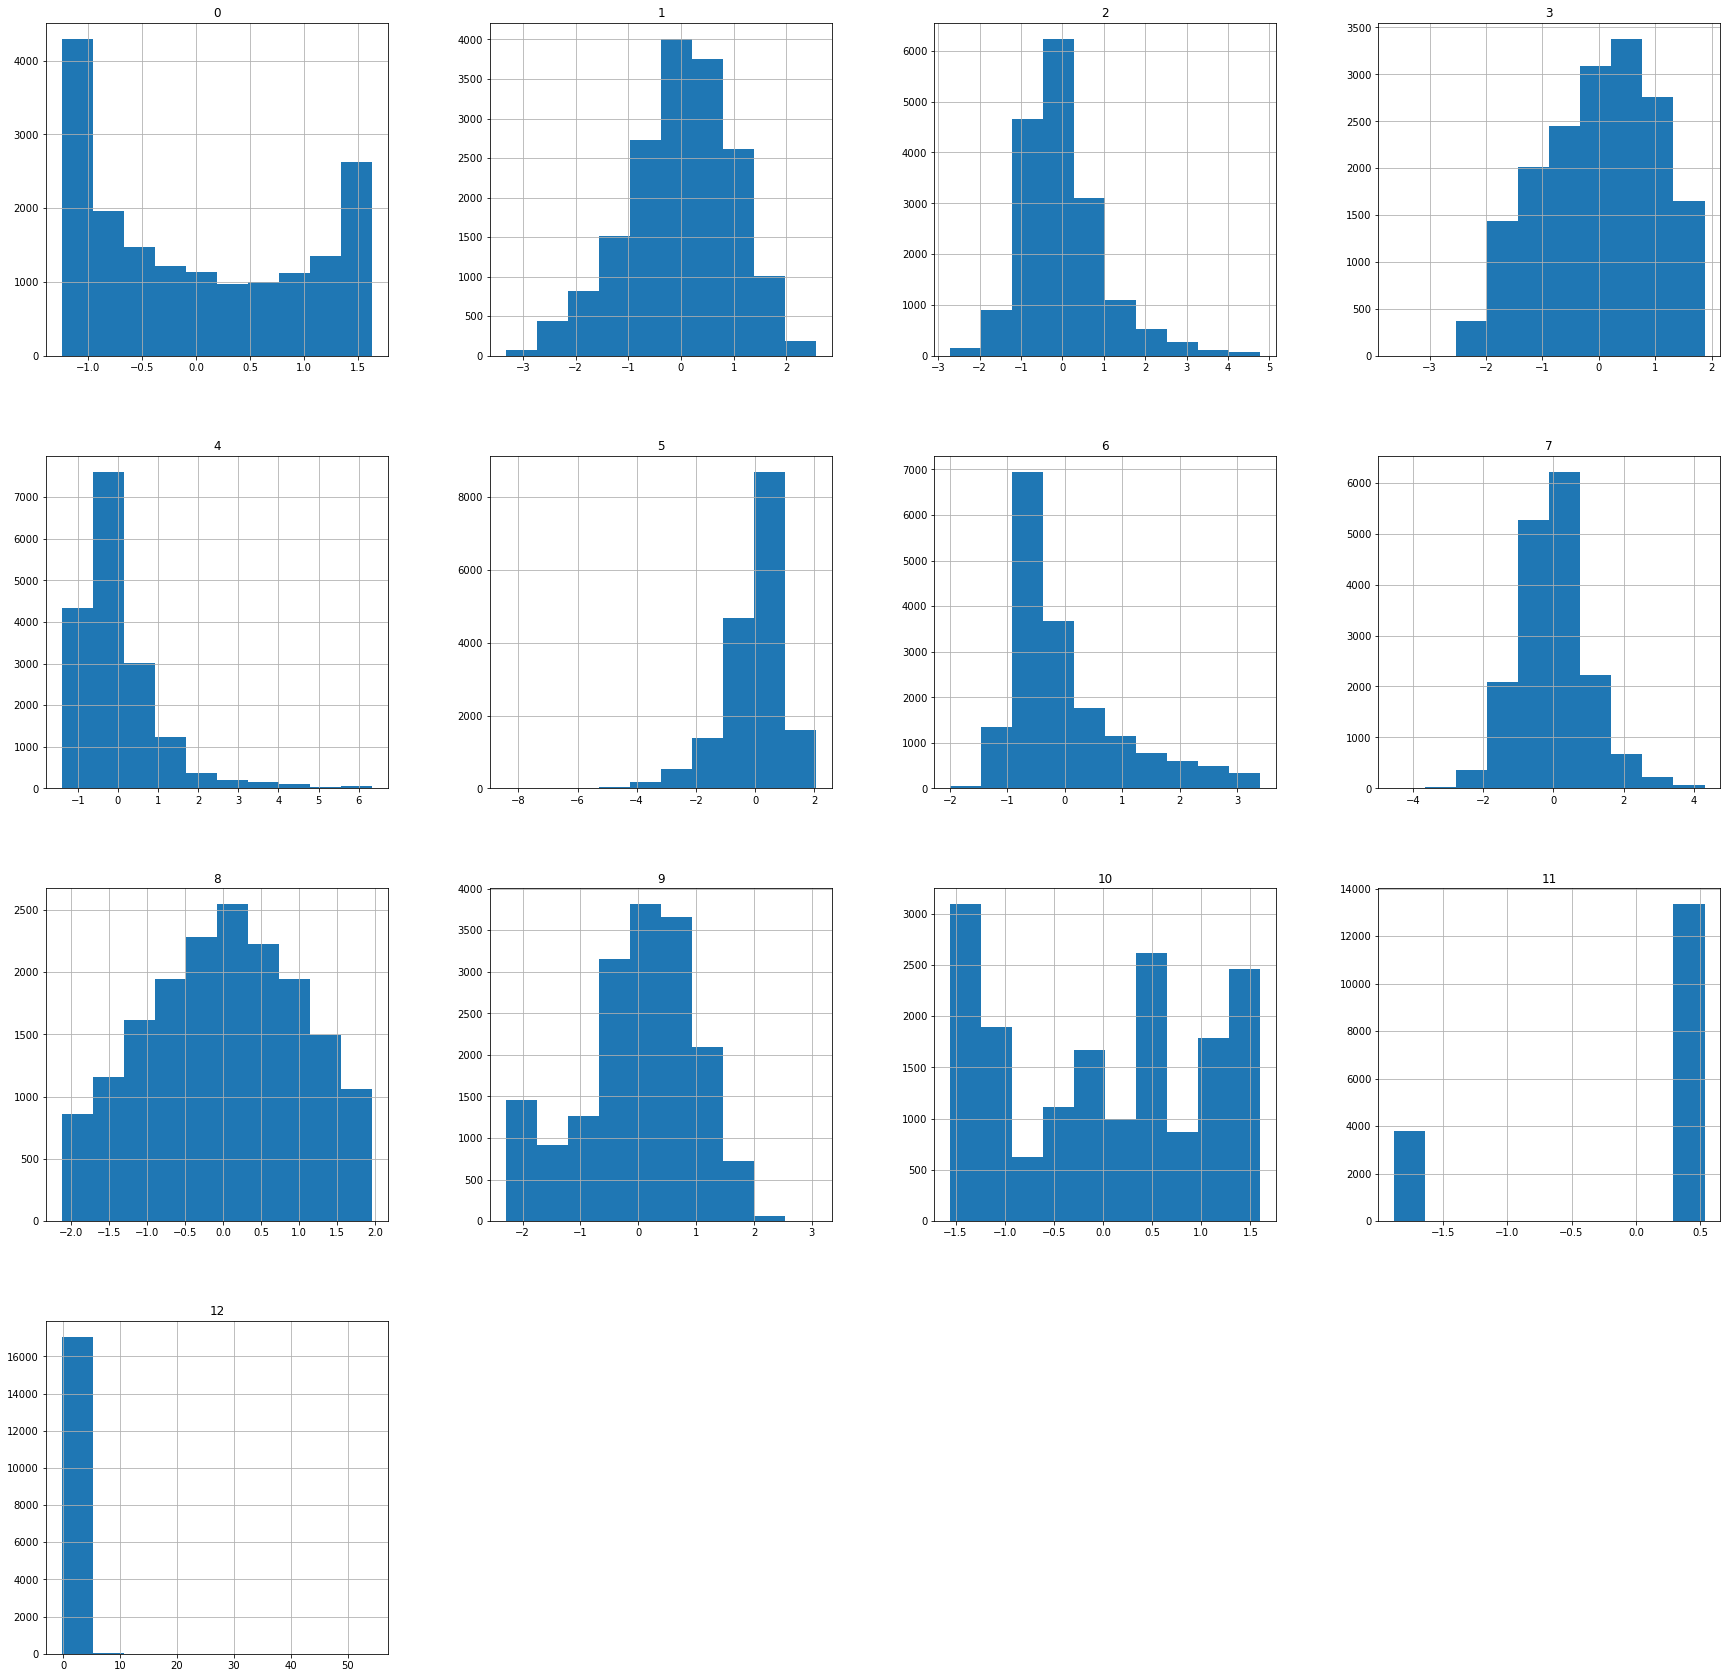

In [43]:
data_sc.hist(figsize=(30,30))
plt.show()

## NEED OF NORMALIZATION

Normalization is generally required when we are dealing with attributes on a different scale, otherwise, it may lead to a dilution in effectiveness of an important equally important attribute(on lower scale) because of other attribute having values on larger scale.
In simple words, when multiple attributes are there but attributes have values on different scales, this may lead to poor data models while performing data mining operations. So they are normalized to bring all the attributes on the same scale.

Standardizing the features around the center 0 with a standard deviation of 1 is important when we compare measurements that have different units.
Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.Hence to avoid bias we need to standardize our data

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution.

We usually prefer standardization over normalization since we are interested in the components that maximize the variance.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.Here in this data set,consider two features- acousticness and tempo. Where acousticness ranges from 0–0.99, while tempo ranges from 0–99 and higher. The values of tempo is  larger than acousticness. As these two features are in very different ranges when we do further analysis like multivariate linear regression, for example, the  tempo will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model.To conclude data normalization transforms multiscaled data to the same scale.The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

## GRAPHS TO CHECK IF THE DATA IS NORMAL 

Using histogram

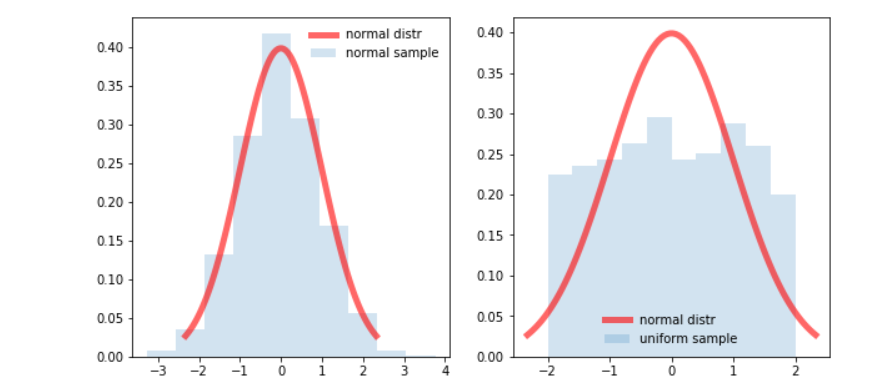

                           Data follows normal distribution                  Data do not follow normal distribution

In [44]:
print(data_sc.describe())

                 0             1             2             3             4   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -1.459047e-16  4.806690e-16 -5.380072e-17 -3.552766e-16  2.127863e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.247891e+00 -3.324056e+00 -2.718964e+00 -3.629443e+00 -1.406689e+00   
25%   -9.610147e-01 -6.160054e-01 -6.374439e-01 -7.604692e-01 -6.366405e-01   
50%   -1.923825e-01  7.245455e-02 -1.542142e-01  9.308279e-02 -2.694049e-01   
75%    9.760015e-01  7.137969e-01  4.390100e-01  7.893186e-01  2.976362e-01   
max    1.632470e+00  2.568754e+00  4.785797e+00  1.871468e+00  6.336488e+00   

                 5             6             7             8             9   \
count  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04  1.713600e+04   
mean  -9.526402e-18 -5.949567e-17  5.308545e-16 -5.779820e-16  3.294906e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.

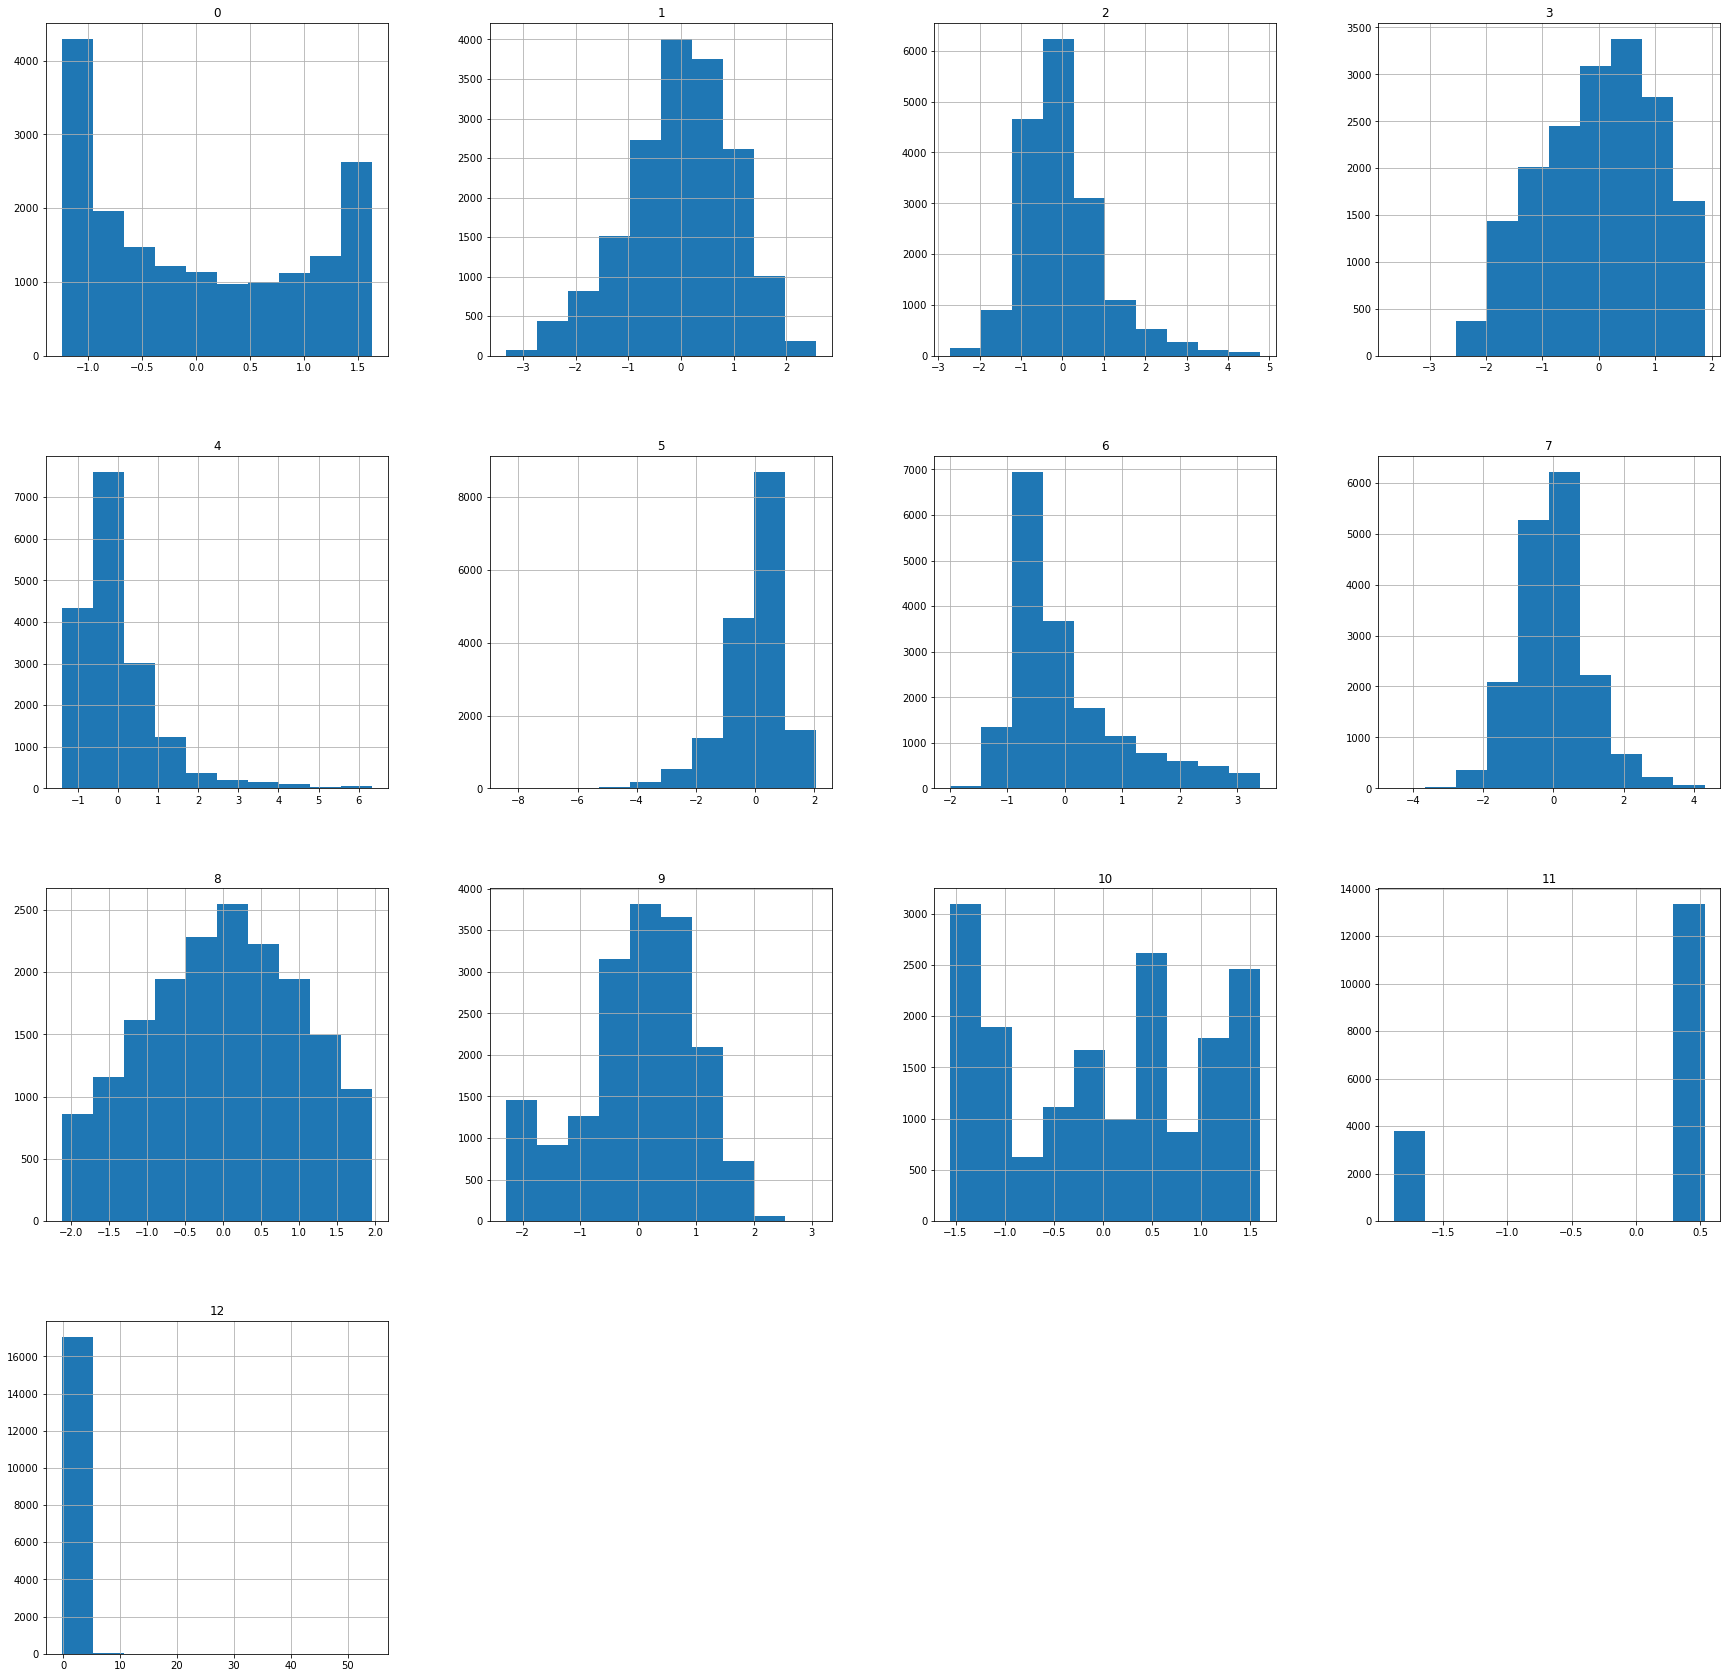

In [45]:
data_sc.hist(figsize=(30,30))
plt.show()

#### Using qqplots

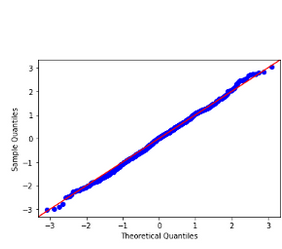

                                                  qqplot for perfectly Normal distribution

### BEFORE NORMALIZATION

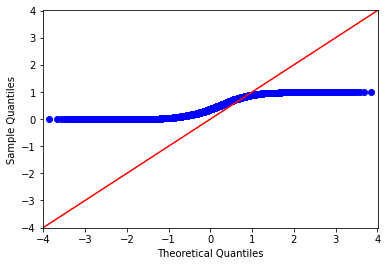

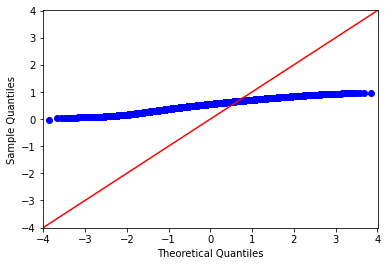

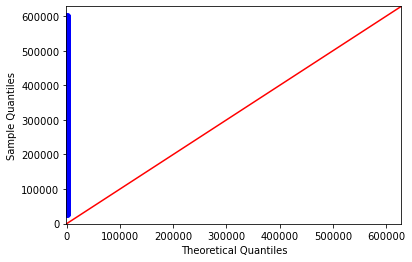

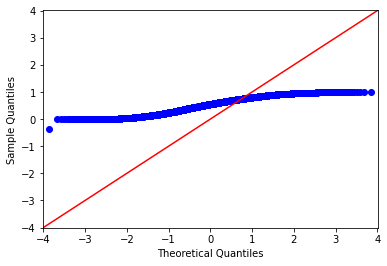

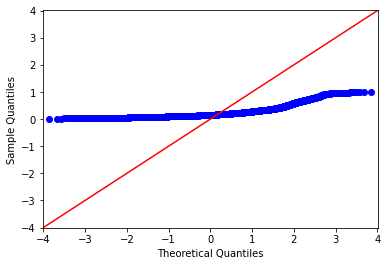

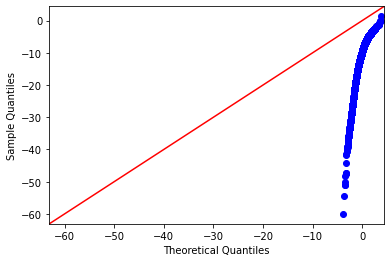

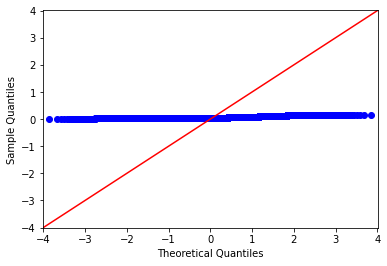

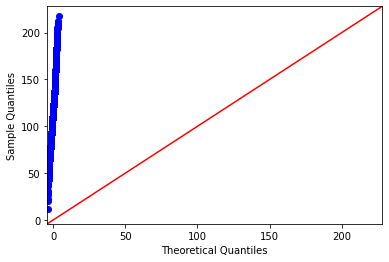

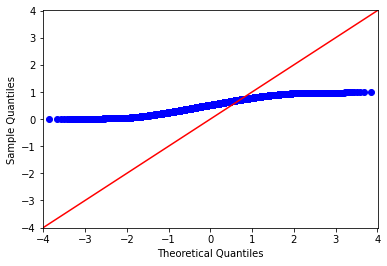

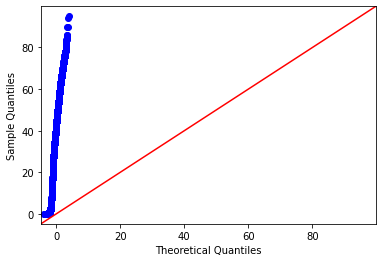

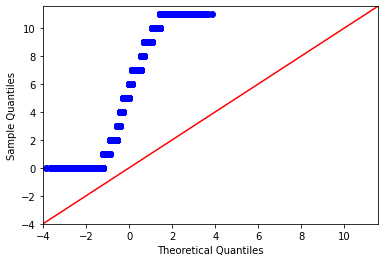

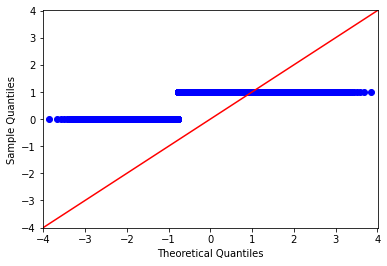

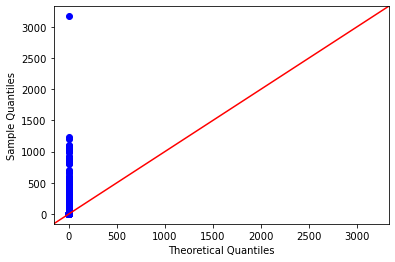

In [46]:
for i in data:
    sm.qqplot(data[i], line='45')
    pylab.show()

#### AFTER NORMALIZATION

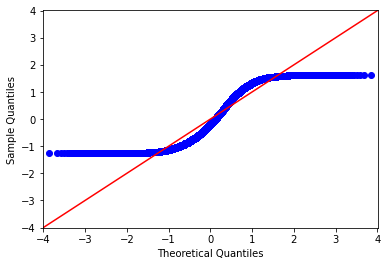

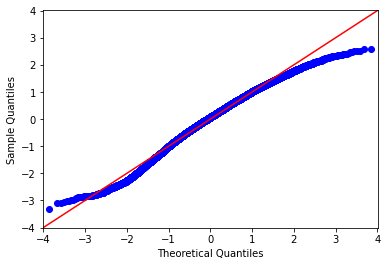

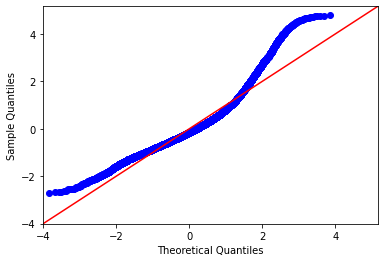

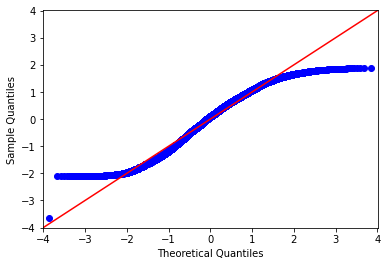

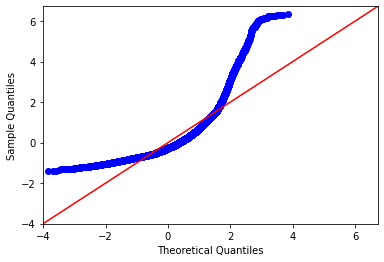

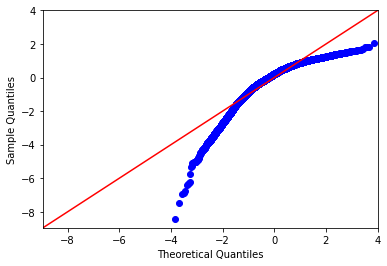

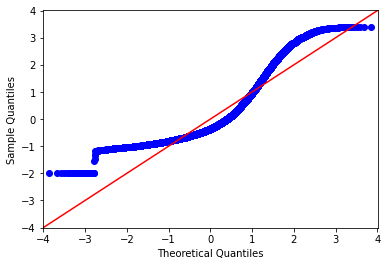

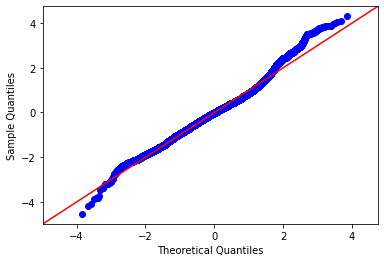

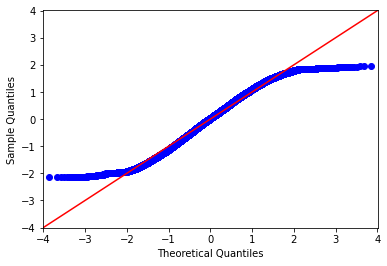

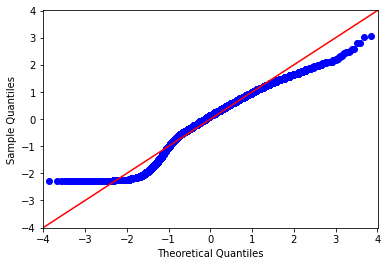

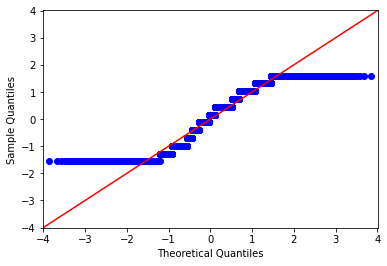

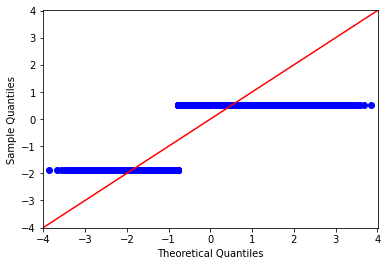

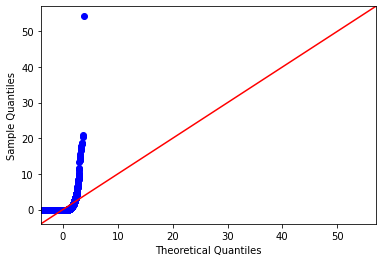

In [47]:
for i in data_sc:
    sm.qqplot(data_sc[i], line='45')
    pylab.show()
